In [12]:
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp

## Test der Messverfahren

Hier wurden unterschiedliche Methoden ausprobiert, um die Performance von mbedtls zu messen.
- gettimeofday()
- clock_gettime()
- Componente perfmon von idf-esp (#include "perfmon.h")
- CCOUNT Register vom CPU (#include "esp_cpu.h")

[101.0481757710139, 100.89972190413872, 100.81762749445676, 100.5889423076923, 100.46671111534432, 100.40021972847838]


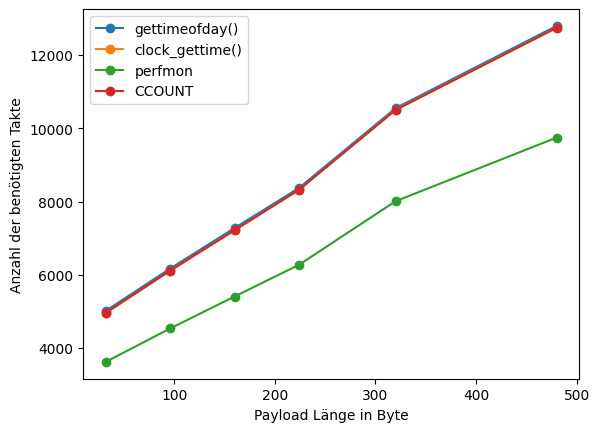

In [21]:
payload_len = [32, 96, 160, 224, 320, 480]
gettimeofday =[5013, 6168, 7275, 8369, 10548, 12794]
clock_gettime = [4954, 6110, 7214, 8318, 10507, 12744]
perfmon = [3620, 4533, 5406, 6271, 8008, 9745]
CCOUNT = [4961, 6113, 7216, 8320, 10499, 12743]
res = []

for i, j in zip(gettimeofday, CCOUNT):
    res.append(i * 100 /j)

print(res)
plt.plot(payload_len, gettimeofday, marker="o", label="gettimeofday()")
plt.plot(payload_len, clock_gettime, marker="o", label="clock_gettime()")
plt.plot(payload_len, perfmon, marker="o", label="perfmon")
plt.plot(payload_len, CCOUNT, marker="o", label="CCOUNT")
plt.xlabel("Payload Länge in Byte")
plt.ylabel("Anzahl der benötigten Takte")
plt.legend()
plt.show()

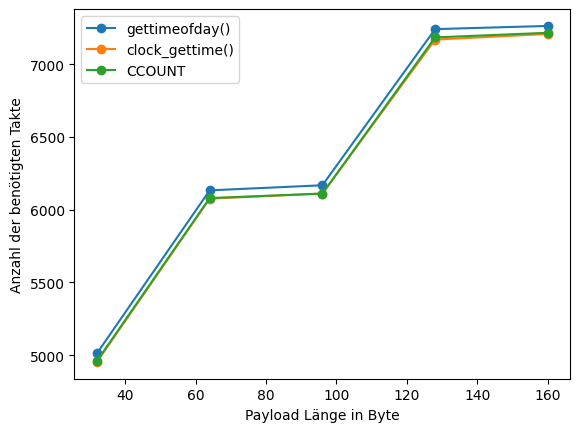

In [23]:
payload_len = [32, 64, 96, 128, 160]
gettimeofday =[5013, 6133, 6168, 7241, 7263]
clock_gettime = [4954, 6076, 6111, 7169, 7208]
CCOUNT = [4961, 6080, 6111, 7184, 7216]

plt.plot(payload_len, gettimeofday, marker="o", label="gettimeofday()")
plt.plot(payload_len, clock_gettime, marker="o", label="clock_gettime()")
plt.plot(payload_len, CCOUNT, marker="o", label="CCOUNT")
plt.xlabel("Payload Länge in Byte")
plt.ylabel("Anzahl der benötigten Takte")
plt.legend()
plt.show()

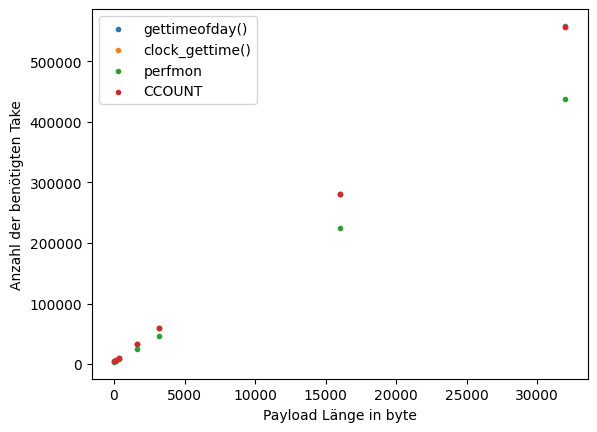

In [ ]:
plt.scatter(payload_len, gettimeofday, marker=".", label="gettimeofday()")
plt.scatter(payload_len, clock_gettime, marker=".", label="clock_gettime()")
plt.scatter(payload_len, perfmon, marker=".", label="perfmon")
plt.scatter(payload_len, CCOUNT, marker=".", label="CCOUNT")
plt.xlabel("Payload Länge in byte")
plt.ylabel("Anzahl der benötigten Take")
plt.legend()
plt.show()

[1816, 1814, 1818, 1818, 1817]


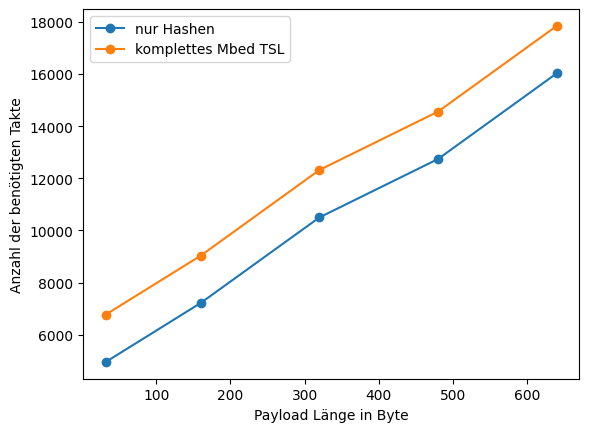

In [33]:
payload_len = [32, 160, 320, 480, 640]
CCOUNT = [4960, 7221, 10500, 12740, 16025]
Complete = [6776, 9035, 12318, 14558, 17842]
res = []

for i,j in zip(CCOUNT, Complete):
    res.append(j-i)

print(res)
plt.plot(payload_len, CCOUNT, marker="o", label="nur Hashen")
plt.plot(payload_len, Complete, marker="o", label="komplettes Mbed TSL")
plt.xlabel("Payload Länge in Byte")
plt.ylabel("Anzahl der benötigten Takte")
plt.legend()
plt.show()

[1.2657258064516128, 2.5025619720260353, 3.396857142857143, 3.725667189952904]


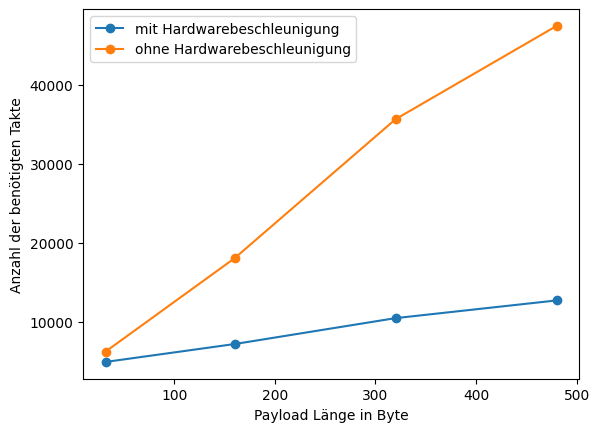

In [39]:
payload_len = [32, 160, 320, 480]
CCOUNT = [4960, 7221, 10500, 12740]
without_Acc = [6278, 18071, 35667, 47465]
res = []

for i,j in zip(CCOUNT, without_Acc):
    res.append(j/i)

print(res)
plt.plot(payload_len, CCOUNT, marker="o", label="mit Hardwarebeschleunigung")
plt.plot(payload_len, without_Acc, marker="o", label="ohne Hardwarebeschleunigung")
plt.xlabel("Payload Länge in Byte")
plt.ylabel("Anzahl der benötigten Takte")
plt.legend()
plt.show()